Данный проект посвящён анализу данных о студентах, включающих информацию об их поле, направлении обучения и итоговых оценках.
Основная цель — понять общие закономерности в распределении студентов, сравнить результаты по разным программам и визуализировать ключевые показатели.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

## 1) Импортируйте данные из CSV файла

In [3]:
df = pd.read_csv('students_data.csv') # Импортируем CSV-файл `students_data.csv` 
df

,Unnamed: 0,student_id,age,gender,governmental_grant,programm,total_mark
0,0,950938,17,male,0,data_analysis,75
1,1,935567,18,male,0,data_engineering,68
2,2,493038,20,male,0,data_analysis,47
3,3,698896,21,male,0,data_engineering,100
4,4,787126,21,male,0,data_analysis,48
...,...,...,...,...,...,...,...
4995,4995,542080,22,male,0,data_analysis,100
4996,4996,443982,21,female,1,data_engineering,84
4997,4997,617473,21,male,0,data_engineering,51
4998,4998,917387,20,female,0,data_analysis,40


## 2) Опишите строки и колонки

In [5]:
df.info() # Изучаем структуру файла с помощью .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          5000 non-null   int64 
 1   student_id          5000 non-null   int64 
 2   age                 5000 non-null   int64 
 3   gender              5000 non-null   object
 4   governmental_grant  5000 non-null   int64 
 5   programm            5000 non-null   object
 6   total_mark          5000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


В данных содержатся 5000 строк и 7 колонок, такие как: Unnamed: 0 (совпадает с id в таблице), id студентов, возраст, пол, наличие или отсутствие гранта, специальность и оценка.

## 3) Посчитайте количество студентов, сгруппированных по полам и программам обучения

In [2]:
amount = df.groupby(['gender', 'programm']).size().reset_index(name='count') # Группируем студентов по полу и направлению обучения

NameError: name 'df' is not defined

In [9]:
amount

,gender,programm,count
0,female,data_analysis,789
1,female,data_engineering,494
2,female,data_science,672
3,male,data_analysis,889
4,male,data_engineering,1148
5,male,data_science,1008


## 4) Постройте круговую диаграмму, описывающую пропорции мальчиков и девочек, обучающихся в университете.

gender_count = df['gender'].value_counts()
gender_count

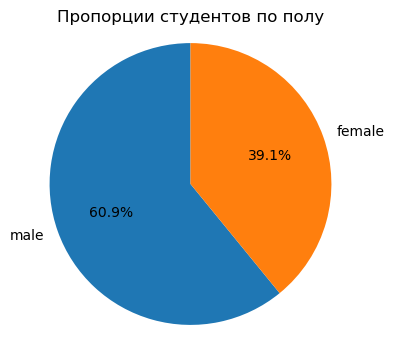

In [19]:
plt.figure(figsize=(4, 4)) # Строим круговую диаграмму, показывающую процентное соотношение студентов разных полов
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Пропорции студентов по полу')
plt.axis('equal') 
plt.show()

## 5) Опишите диаграмму

По диаграмме видно, что большинство студентов являются мужского пола, а точнее 60,9%, остальные 39,1% женского пола.

## 6) Постройте график, который описывает распределение оценок по вашей выборке

In [30]:
grade_distribution = df['total_mark'].value_counts().sort_index()

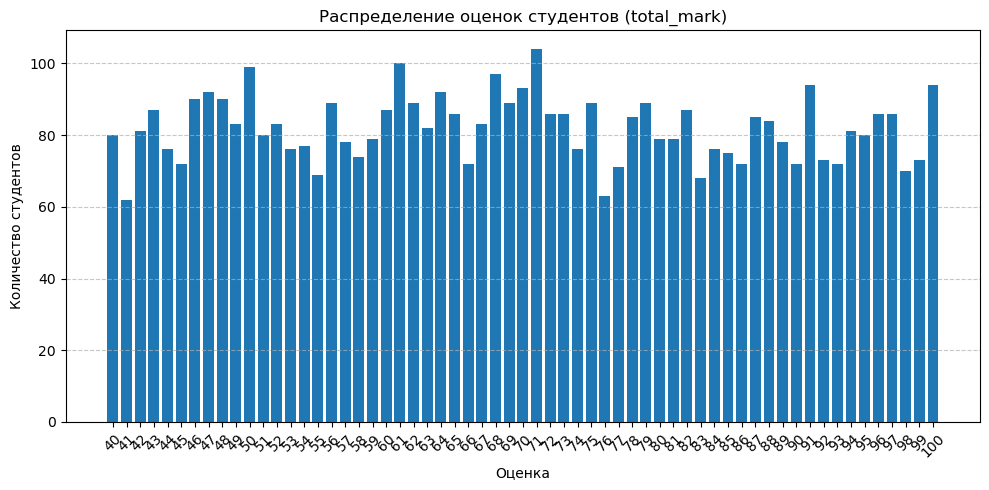

In [32]:
plt.figure(figsize=(10, 5)) # Строим гистограмму для оценки распределения итоговых баллов
plt.bar(grade_distribution.index, grade_distribution.values)
plt.title('Распределение оценок студентов (total_mark)')
plt.xlabel('Оценка')
plt.ylabel('Количество студентов')
plt.xticks(grade_distribution.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 7) Опишите график

По графику можно увидеть, что все студенты набрали оценку больше 40. Больше 100 студентов набрали оценку 71, а меньше всего, чуть больше 60 студентов, набрали 41.
Более 90 студентов набрали 100, что говорит об общей хорошей успеваемости.
Многие набрали между 45 и 70 баллами.
Если в общем смотреть на диаграмму, то она не симметрична и распределение не является нормальным.

## 8) Напишите функцию, которая расставит категории от 1-3, в зависимости от выбранной специализации. Например 1- Дата Аналитика, 2 - Дата Саентс, 3 - Дата Инжениринг.

In [45]:
def assign_category(specialization):
    if specialization.lower() == 'data_analysis':
        return 1
    elif specialization.lower() == 'data_science':
        return 2
    elif specialization.lower() == 'data_engineering':
        return 3
    else:
        return 0

In [47]:
df['category'] = df['programm'].apply(assign_category)

In [49]:
df

,Unnamed: 0,student_id,age,gender,governmental_grant,programm,total_mark,category
0,0,950938,17,male,0,data_analysis,75,1
1,1,935567,18,male,0,data_engineering,68,3
2,2,493038,20,male,0,data_analysis,47,1
3,3,698896,21,male,0,data_engineering,100,3
4,4,787126,21,male,0,data_analysis,48,1
...,...,...,...,...,...,...,...,...
4995,4995,542080,22,male,0,data_analysis,100,1
4996,4996,443982,21,female,1,data_engineering,84,3
4997,4997,617473,21,male,0,data_engineering,51,3
4998,4998,917387,20,female,0,data_analysis,40,1


## 9) Постройте матрицу корреляций и опишите увиденные взаимосвязи

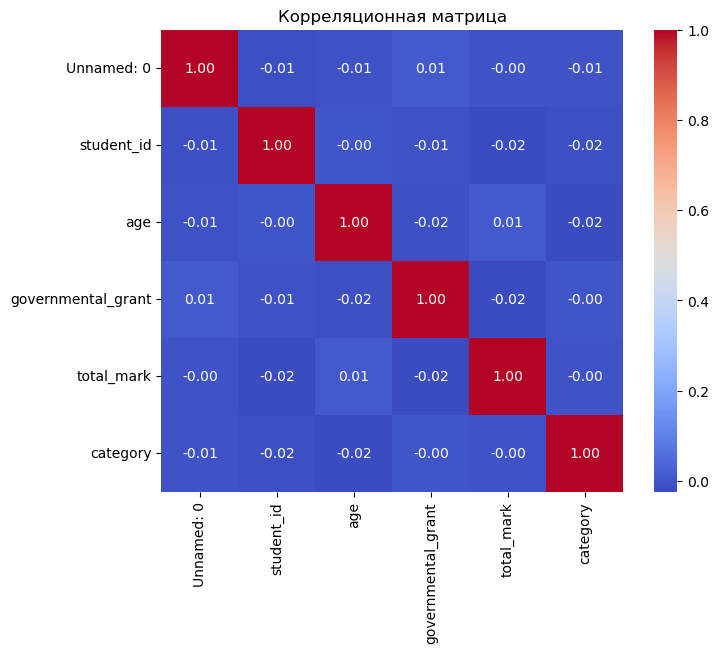

In [60]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Корреляционная матрица')
plt.show()

Первое, что можно заметить, это то, что все значения очень близки к нулю, что говорит о слабой зависимости между переменными. Это означает, например, то, что такие факторы как пол или возраст студента слабо влияют на выбранную специальность или оценку.

## 10) Проверьте следующие гипотезы:
H1 - Пол стат. значимо влияет на конечную оценку total_mark
H0 - Пол стат. значимо не влияет на конечную оценку total_mark

In [66]:
male_marks = df[df['gender'] == 'male']['total_mark']
female_marks = df[df['gender'] == 'female']['total_mark']

In [68]:
stat, p = mannwhitneyu(male_marks, female_marks, alternative='two-sided')

In [70]:
print(f'U-статистика: {stat:.2f}, p-значение: {p:.4f}')

U-статистика: 2994521.00, p-значение: 0.7173


In [72]:
if p < 0.05:
    print("Пол стат. значимо влияет на конечную оценку")
else:
    print("Пол стат. значимо не влияет на конечную оценку")

Пол стат. значимо не влияет на конечную оценку


## 11) Опишите ваши выводы и метод для проверки гипотез

Для проверки влияния пола на итоговую оценку был использован тест Манна–Уитни, так как этот тест удобен для сравнения двух независимых выборок, когда распределение может отличаться от нормального.
Так как p-значение значительно больше уровня значимости 0.05, мы не отвергаем нулевую гипотезу. Различия в оценках между мальчиками и девочками не являются значимыми. Это так же подтверждалось ранее с помощью матрицы корреляции.

## 12) Напишите конечный вывод с вашим заключением, содержащим все прежне перечисленные выводы

Большинство студентов — мужского пола (60,9%), женского — 39,1%. Все получили больше 40 баллов, чаще всего - 71, а более 90 человек набрали 100 баллов. Распределение оценок несимметрично и отличается от нормального.

Матрица корреляций показала, что между переменными нет выраженных связей. Для проверки влияния пола на итоговую оценку применён тест Манна–Уитни, показавший что пол не влияет на итоговую оценку.

В целом, оценки студентов слабо зависят от пола, возраста и специальности.